## Author:Florencia
Final Exam_ Introduction to Data Science

## Exploratory data analysis and visualization using Python

### Memuat Libraries

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

### Memuat Data

In [ ]:
confirmed_cases_data = 'time_series_covid19_confirmed_global.csv'
death_cases_data = 'time_series_covid19_deaths_global.csv'
recovered_cases_data = 'time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data)
raw_data_deaths = pd.read_csv(death_cases_data)
raw_data_recovered = pd.read_csv(recovered_cases_data)

### Kasus terkonfirmasi COVID-19

**Langkah selanjutnya dalam proses explorasi dan visualisai data covid-19 adalah menampilkan beberapa baris teratas, informasi, dan deskriptif statistik dataframe `raw_data_confirmed`**

In [ ]:
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,...,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17


In [ ]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  263 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/2020       263 non-null    int64  
 5   1/23/2020       263 non-null    int64  
 6   1/24/2020       263 non-null    int64  
 7   1/25/2020       263 non-null    int64  
 8   1/26/2020       263 non-null    int64  
 9   1/27/2020       263 non-null    int64  
 10  1/28/2020       263 non-null    int64  
 11  1/29/2020       263 non-null    int64  
 12  1/30/2020       263 non-null    int64  
 13  1/31/2020       263 non-null    int64  
 14  2/1/2020        263 non-null    int64  
 15  2/2/2020        263 non-null    int64  
 16  2/3/2020        263 non-null    int64  
 17  2/4/2020        263 non-null    int

In [ ]:
raw_data_confirmed.describe()

,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.00000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,21.339244,22.068133,2.110266,2.486692,3.577947,5.452471,8.053232,11.129278,21.209125,23.444867,31.307985,37.745247,45.771863,63.828897,75.593156,90.844106,105.076046,117.087452,130.764259,141.140684,152.661597,162.593156,170.349810,171.942966,229.536122,254.315589,262.471483,270.813688,278.547529,285.688213,287.600760,289.722433,292.087452,298.752852,300.220532,302.513308,305.726236,309.460076,314.623574,319.81749,327.038023,336.003802,343.368821,353.003802,361.673004,372.190114,387.076046,402.460076,417.570342,431.901141,451.026616,478.612167,488.030418,552.110266,593.539924,636.707224,690.395437,749.437262,816.809886,922.319392,1035.011407,1157.821293,1281.190114,1438.155894,1589.524715,1778.148289,2013.653992,2255.859316,2512.190114,2738.174905,2974.885932,3260.406844,3546.026616,3852.927757,4166.984791,4552.870722,4836.939163,5114.452471,5422.418251
std,24.779585,70.785949,27.434015,27.532888,34.275498,47.702207,66.662110,89.815834,220.427512,221.769901,305.614661,362.331930,445.871350,692.935941,837.671954,1032.399526,1216.612056,1367.637255,1542.819479,1675.277447,1831.231877,1960.457216,2061.434174,2061.774351,2974.824847,3356.660093,3470.253449,3589.366019,3700.701127,3805.013537,3826.544025,3851.851318,3865.477908,3953.053686,3953.090332,3965.659821,3996.448782,4021.344113,4047.111642,4067.69811,4095.698892,4133.112925,4148.054007,4160.475971,4171.952587,4186.101105,4203.394057,4220.800907,4237.285207,4256.803896,4272.911234,4306.276373,4316.574662,4410.225194,4492.263156,4587.887549,4701.995471,4837.799546,5019.924880,5312.704900,5668.932552,6098.866935,6536.774297,7145.980590,7762.409314,8586.491232,9701.702166,10865.641188,12146.991191,13348.022358,14659.339365,16274.718201,17892.269613,19740.409389,21707.026686,23983.928488,25717.561274,27517.452168,29418.401918
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

### 1. Jumlah kasus terkonfirmasi COVID-19 berdasarkan negara

**Informasi diatas masih sangat general sehingga diperlukan informasi yang lebih spesifik, salah satunya yaitu mendapatkan informasi jumlah kasus terkonfirmasi COVID-19 berdasarkan kriteria tertentu seperti menampilkan dataframe`confirmed_country`yang berisi jumlah kasus terkonfirmasi COVID-19 di setiap negara berdasarkan deret waktu(time series) yang terindeks berdasarkan waktu(date/time) bukan berdasarkan `Country/Region`**.

In [ ]:
new_confirmed = raw_data_confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

new_confirmed = raw_data_confirmed.groupby('Country/Region').sum().T
new_confirmed.reset_index(inplace=True)
new_confirmed = new_confirmed.rename(columns={"index":"Date"})
confirmed_country = new_confirmed.set_index("Date")
confirmed_country_data = confirmed_country.copy()
confirmed_country

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0
1/24/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0
1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0
1/26/2020,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/3/2020,281,304,1171,439,8,15,1265,736,5330,11524,443,24,672,61,51,351,16770,4,16,5,132,579,4,9056,134,485,302,20,3,6,114,509,12437,8,8,3737,82511,1267,22,134,...,0,2039,207,1476,10,2,1114,450,934,7,1505,0,119199,159,10,10,6131,19606,16,348,20,1978,1,40,98,495,20921,275586,48,1072,1264,38689,369,227,153,237,194,0,39,9
4/4/2020,299,333,1251,466,10,15,1451,770,5550,11781,521,28,688,70,52,440,18431,4,16,5,139,624,4,10360,135,503,318,21,3,7,114,555,12978,8,9,4161,82543,1406,22,154,...,0,2179,219,1624,10,4,1189,471,977,7,1585,0,126168,166,10,10,6443,20505,16,355,20,2067,1,41,103,553,23934,308850,48,1225,1505,42477,400,266,155,240,217,0,39,9
4/5/2020,349,361,1320,501,14,15,1451,822,5687,12051,584,28,700,88,56,562,19691,5,22,5,157,654,6,11130,135,531,345,21,3,7,114,650,15756,8,9,4471,82602,1485,45,154,...,0,2402,222,1908,10,6,1309,485,997,7,1655,1,131646,176,12,10,6830,21100,19,363,22,2169,1,44,104,574,27069,337072,52,1308,1799,48436,400,342,159,241,237,4,39,9


In [ ]:
raw_data_confirmed = pd.read_csv(confirmed_cases_data)
new_confirmed = raw_data_confirmed.groupby('Country/Region').sum()
new_confirmed.reset_index(inplace=True)
new_confirmed = new_confirmed.T
new_confirmed = new_confirmed.drop(['Lat', 'Long'], axis=0)
new_confirmed = new_confirmed.rename(index={'Country/Region':'Date'})
new_confirmed.reset_index(inplace=True)
new_confirmed.columns = new_confirmed.iloc[0]
confirmed_country = new_confirmed.drop(0)
confirmed_country

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),...,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
1,1/22/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0
3,1/24/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,...,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0
4,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,...,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0
5,1/26/2020,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,...,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,4/3/2020,281,304,1171,439,8,15,1265,736,5330,11524,443,24,672,61,51,351,16770,4,16,5,132,579,4,9056,134,485,302,20,3,6,114,509,12437,8,8,3737,82511,1267,22,...,0,2039,207,1476,10,2,1114,450,934,7,1505,0,119199,159,10,10,6131,19606,16,348,20,1978,1,40,98,495,20921,275586,48,1072,1264,38689,369,227,153,237,194,0,39,9
74,4/4/2020,299,333,1251,466,10,15,1451,770,5550,11781,521,28,688,70,52,440,18431,4,16,5,139,624,4,10360,135,503,318,21,3,7,114,555,12978,8,9,4161,82543,1406,22,...,0,2179,219,1624,10,4,1189,471,977,7,1585,0,126168,166,10,10,6443,20505,16,355,20,2067,1,41,103,553,23934,308850,48,1225,1505,42477,400,266,155,240,217,0,39,9
75,4/5/2020,349,361,1320,501,14,15,1451,822,5687,12051,584,28,700,88,56,562,19691,5,22,5,157,654,6,11130,135,531,345,21,3,7,114,650,15756,8,9,4471,82602,1485,45,...,0,2402,222,1908,10,6,1309,485,997,7,1655,1,131646,176,12,10,6830,21100,19,363,22,2169,1,44,104,574,27069,337072,52,1308,1799,48436,400,342,159,241,237,4,39,9
76,4/6/2020,367,377,1423,525,16,15,1554,833,5797,12297,641,29,756,123,60,700,20814,7,26,5,183,674,6,12161,135,549,364,22,3,7,114,658,16563,8,9,4815,82665,1579,45,...,4,2605,226,2200,11,6,1375,534,1021,7,1686,1,136675,178,12,10,7206,21657,19,373,24,2220,1,58,105,596,30217,366667,52,1319,2076,52279,406,457,165,245,254,4,39,10


##### Hasil analisis berdasarkan hasil diatas:  
Data kasus (pasien) Covid-19 yang terkonfirmasi pada kurun waktu 22 Januari 2020 hingga 7 April 2020 mengalami kenaikan dan dapat dilihat bahwa negara yang memiliki kasus terbanyak pertama kali adalah negara China dengan angka 548, sedangkan di negara-negara lain, kasus Covid019 masih belum terkonfirmasi, ada beberapa negara seperti Taiwan, Thailand, dan US (AS). Namun pada ketiga negara tersebut kasus yang terkonfirmasi pada tangga 22 Januari 2020 hanya 1 hingga 2 saja tidak sebanyak di negara China.

Dapat dilihat dari Tabel bahwa pada tanggal 7 April 2020 negara US memiliki kasus terkonfirmasi paling banyak walaupun awalnya kasus ini lebih banyak terdapat/ terkonfirmasi di negara China.


### 2. Visualisasi kasus terkonfirmasi COVID-19 berdasarkan negara

**Setelah memiliki sebuah dataframe yang berisi kasus terkonfirmasi COVID-19 yang terindeks berdasarkan waktu. Selanjutnya akan dilakukan visualisasi berdasarkan data jumlah kasus terkonfirmasi di negara-negara berikut (Prancis, Spanyol, Cina, AS, Italia, dan Australia).**

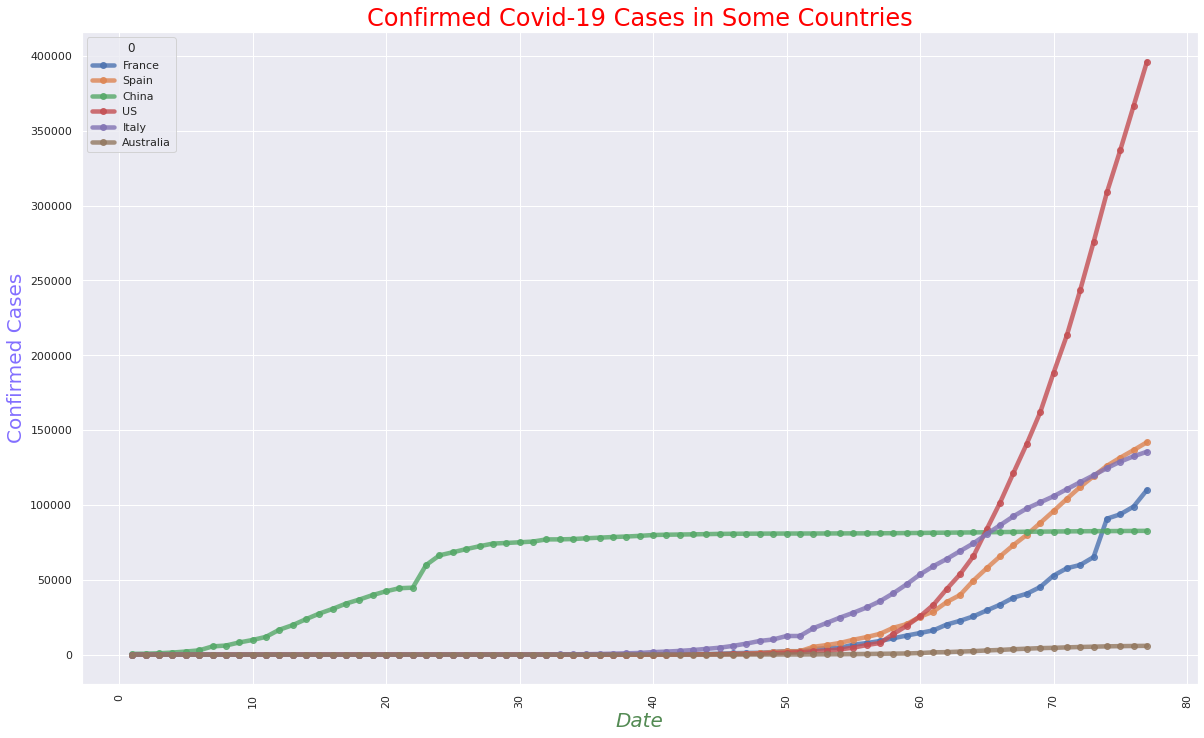

In [ ]:
confirmed_country[["France", "Spain", "China", "US", "Italy", "Australia"]].plot(alpha = 0.8, linewidth=4.5, marker='o', markersize=6)
plt.xticks(rotation=90)
plt.title("Confirmed Covid-19 Cases in Some Countries", size=24, color='Red')
plt.xlabel('Date', size=20, color='#548B54', style='italic')
plt.ylabel('Confirmed Cases', size=20, color='#836FFF')
plt.gcf().set_size_inches(20, 12)

##### Tuliskan analisis anda berdasarkan hasil visualisasi diatas:
Dapat dilihat melalui grafik diatas bahwa negara China mengalami kenaikan kasus Covid-19 lebih dulu dibandingkan negara lainnya. Namun negara China mampu mempertahankan jumlah kasus terkonfirmasi. Lain halnya dengan negara US (Amerika Serikat), US tidak mengalami kenaikan kasus yang terkonfirmasi pada akhir Januari 2020 namun sekitar pertengahan bulan Maret, US mengalami kenaikan kasus Covid-19 yang sangat pesat sehingga pada akhir catatan yang terdapat, kasus Covid-19 terkonfirmasi yang paling banyak dimiliki oleh negara US.

Negara Australia merupakan negara dengan pertumbuhan kasus Covid-19 terkonfirmasi yang paling kecil, dari grafik diatas terlihat bahwa angka yang dimiliki negara Australi merupakan yang peling rendah, perubahannya pun tidak terlalu terlihat bila dibandingkan dengan grafik negara lain. Dapat dilihat bahwa negara Perancis, Spanyol, dan Italia mengalami kenaikan kasus yang tidak jauh berbeda dan juga dalam kurun waktu yang tidak jauh berbeda.

### 3. Jumlah kasus kematian COVID-19 yang dilaporkan berdasarkan negara (Bobot: 15%)

**Tampilan dari beberapa baris teratas/terbawah beserta informasi dari dataframe `raw_data_deaths`**

In [ ]:
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,...,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2


In [ ]:
raw_data_deaths.tail()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,...,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.18636,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(raw_data_deaths.info())
raw_data_deaths.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  263 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/2020       263 non-null    int64  
 5   1/23/2020       263 non-null    int64  
 6   1/24/2020       263 non-null    int64  
 7   1/25/2020       263 non-null    int64  
 8   1/26/2020       263 non-null    int64  
 9   1/27/2020       263 non-null    int64  
 10  1/28/2020       263 non-null    int64  
 11  1/29/2020       263 non-null    int64  
 12  1/30/2020       263 non-null    int64  
 13  1/31/2020       263 non-null    int64  
 14  2/1/2020        263 non-null    int64  
 15  2/2/2020        263 non-null    int64  
 16  2/3/2020        263 non-null    int64  
 17  2/4/2020        263 non-null    int

,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.00000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,21.339244,22.068133,0.064639,0.068441,0.098859,0.159696,0.212928,0.311787,0.498099,0.505703,0.650190,0.809886,0.984791,1.376426,1.619772,1.870722,2.144487,2.410646,2.733840,3.064639,3.444867,3.851711,4.231939,4.250951,5.212928,5.790875,6.334601,6.730038,7.102662,7.631179,8.068441,8.543726,8.558935,9.346008,9.387833,9.996198,10.296578,10.532319,10.699620,10.920152,11.182510,11.391635,11.730038,12.015209,12.372624,12.730038,13.155894,13.528517,14.456274,15.163498,16.205323,17.547529,17.946768,20.547529,22.125475,24.486692,27.095057,30.057034,33.205323,37.51711,42.961977,49.326996,55.707224,62.756654,70.817490,80.536122,91.140684,103.414449,116.547529,128.992395,142.897338,160.102662,177.980989,201.456274,223.524715,245.650190,263.779468,283.517110,311.273764
std,24.779585,70.785949,1.048265,1.049842,1.481991,2.467570,3.207860,4.687336,7.707870,7.708363,9.989654,12.578986,15.353337,21.580644,25.526814,29.534532,33.850395,38.105000,43.099006,48.093179,53.703631,60.054213,65.850074,65.849685,80.770339,89.834570,98.405117,104.570182,110.304890,118.444067,125.102016,132.190749,132.189992,144.644121,144.642735,153.829029,158.021726,161.227845,162.833091,165.364498,168.146896,170.254039,172.869803,174.886746,177.178431,179.214357,181.202626,183.128365,185.727240,188.037575,191.076470,195.542104,196.683060,206.426051,212.526091,224.974720,238.902297,254.838193,276.691253,299.47845,333.017901,377.432315,418.455076,461.209712,512.649402,570.764973,631.451889,705.590002,782.685939,853.529247,932.891934,1017.331043,1105.514797,1216.669266,1326.074756,1434.819008,1524.296508,1623.146724,1760.718198
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.938500,-21.031300,0.000000,0.0

##### Analisis berdasarkan hasil diatas:
Dari ketiga informasi diatas terlihat bahwa angka kematian di tiap negara berbeda-beda, dan tidak semua negara memiliki angka kematian dari tanggal 22 januari 2020 hingga 7 april 2020. Namun secara global, angka kematian di beberapa negara terus meningkat dalam kurun waktu tersebut.

Rata-rata kematian, jumlah kematian paling sedikit hingga jumlah kematian yang terbanyak pada tanggal-tanggal tertentu yang dialami oleh negara-negara yang terdapat dalam data yang ada dapat dilihat melalui informasi diatas.


**Beberapa baris teratas/terbawah data kasus kematian COVID-19 di setiap negara yang terindeks berdasarkan waktu(date/time).**

In [ ]:
new_deaths = raw_data_deaths.groupby('Country/Region').sum()
new_deaths.reset_index(inplace=True)
new_deaths = new_deaths.T
new_deaths = new_deaths.drop(['Lat', 'Long'], axis=0)
new_deaths = new_deaths.rename(index={'Country/Region':'Date'})
new_deaths.reset_index(inplace=True)
new_deaths.columns = new_deaths.iloc[0]
new_deaths = new_deaths.drop(0).reset_index(drop=True)

new_deaths.head()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),...,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
0,1/22/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1/24/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/26/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_deaths.tail()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),...,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
72,4/3/2020,6,17,105,16,2,0,39,7,28,168,5,1,4,6,0,4,1143,0,0,0,9,17,1,359,1,14,16,1,0,1,0,8,179,0,0,22,3326,25,2,...,0,25,1,39,0,0,5,1,20,0,9,0,11198,4,2,1,358,591,2,5,1,19,0,3,6,18,425,7087,0,27,9,3611,4,2,7,0,1,0,1,1
73,4/4/2020,7,20,130,17,2,0,43,7,30,186,5,4,4,8,0,5,1283,0,0,0,10,21,1,445,1,17,16,1,0,1,0,9,218,0,0,27,3330,32,2,...,0,29,2,44,0,0,6,1,22,0,9,0,11947,5,2,1,373,666,2,5,1,20,0,3,6,18,501,8407,0,32,10,4320,5,2,7,0,1,0,1,1
74,4/5/2020,7,20,152,18,2,0,44,7,35,204,7,4,4,9,1,8,1447,0,0,0,10,23,1,486,1,20,17,1,0,1,0,9,259,0,0,34,3333,35,5,...,0,34,2,51,0,0,6,1,28,0,11,0,12641,5,2,1,401,715,2,5,1,23,0,3,7,22,574,9619,0,37,10,4943,5,2,7,0,1,0,1,1
75,4/6/2020,11,21,173,21,2,0,48,8,40,220,7,5,4,12,2,13,1632,1,1,0,11,29,1,564,1,22,18,1,0,1,0,9,339,0,0,37,3335,46,5,...,0,38,2,58,0,0,6,2,30,0,12,0,13341,5,2,1,477,765,2,5,1,26,0,3,8,22,649,10783,0,38,11,5385,6,2,7,0,1,0,1,1
76,4/7/2020,14,22,193,22,2,1,56,8,45,243,8,6,5,17,3,13,2035,1,1,0,14,33,1,686,1,23,19,1,0,1,0,9,375,0,0,43,3335,50,5,...,0,41,2,61,0,0,6,2,36,0,13,0,14045,6,2,1,591,821,2,5,1,27,0,3,8,23,725,12722,0,45,12,6171,7,2,7,0,1,0,1,2


In [ ]:
new_deaths

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),...,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
0,1/22/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1/24/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/26/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,4/3/2020,6,17,105,16,2,0,39,7,28,168,5,1,4,6,0,4,1143,0,0,0,9,17,1,359,1,14,16,1,0,1,0,8,179,0,0,22,3326,25,2,...,0,25,1,39,0,0,5,1,20,0,9,0,11198,4,2,1,358,591,2,5,1,19,0,3,6,18,425,7087,0,27,9,3611,4,2,7,0,1,0,1,1
73,4/4/2020,7,20,130,17,2,0,43,7,30,186,5,4,4,8,0,5,1283,0,0,0,10,21,1,445,1,17,16,1,0,1,0,9,218,0,0,27,3330,32,2,...,0,29,2,44,0,0,6,1,22,0,9,0,11947,5,2,1,373,666,2,5,1,20,0,3,6,18,501,8407,0,32,10,4320,5,2,7,0,1,0,1,1
74,4/5/2020,7,20,152,18,2,0,44,7,35,204,7,4,4,9,1,8,1447,0,0,0,10,23,1,486,1,20,17,1,0,1,0,9,259,0,0,34,3333,35,5,...,0,34,2,51,0,0,6,1,28,0,11,0,12641,5,2,1,401,715,2,5,1,23,0,3,7,22,574,9619,0,37,10,4943,5,2,7,0,1,0,1,1
75,4/6/2020,11,21,173,21,2,0,48,8,40,220,7,5,4,12,2,13,1632,1,1,0,11,29,1,564,1,22,18,1,0,1,0,9,339,0,0,37,3335,46,5,...,0,38,2,58,0,0,6,2,30,0,12,0,13341,5,2,1,477,765,2,5,1,26,0,3,8,22,649,10783,0,38,11,5385,6,2,7,0,1,0,1,1


##### Hasil analisis:
Pada kurun waktu 22 Januari 2020 hingga 7 April 2020 terlihat bahwa angka kematian yang diakibatkan oleh Virus Covid-19 terus meningkat. Kasus yang terkonfirmasi juga awalnya terdapat di negara China, demikian pula dengan kasus kematian. Negara China merupakan satu-satunya negara yang memiliki angka kematian pada awal kemunculan virus Covid-19 yang kemudian menyebar di seluruh negara. Terdata bahwa pada tanggal 22 Januari 2020 di negara China terdapat 17 kasus kematian yang disebabkan oleh Covid-19.

Dari data diatas dapat dilihat bahwa kebanyakan negara memiliki kasus kematian yang disebabkan oleh kasus Covid-19 pada akhir kurun waktu tersebut. Namun masih ada negara-negara yang belum memiliki kasus kematian yang disebabkan oleh virus Covid-19 dan negara-negara ini merupakan negara yang memiliki angka kasus terkonfirmasi yang juga sedikit pada akhir kurun waktu 22 Januari hingga 7 April 2020

### 4. Penyelarasan kurva pertumbuhan seluruh negara dengan jumlah kasus kematian COVID-19 ≥ 25

**Untuk mendapatkan gambaran perkembangan kasus covid-19 di berbagai negara, diperlukan penyelarasan kurva pertumbuhan setiap negara. Kurva hanya menampilkan informasi yang dimulai dengan hari dimana data kasus kematian COVID-19 setidaknya 25 orang.**

In [ ]:
new_confirmed["sum"] = confirmed_country.drop('Date',axis=1, inplace=False).sum(axis=1)
display(new_confirmed.drop(0))
new_deaths["sum"] = new_deaths.drop('Date', axis=1, inplace=False).sum(axis=1)
display(new_deaths)

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe,sum
1,1/22/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,555.0
2,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,654.0
3,1/24/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,941.0
4,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,1434.0
5,1/26/2020,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,...,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,2118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,4/3/2020,281,304,1171,439,8,15,1265,736,5330,11524,443,24,672,61,51,351,16770,4,16,5,132,579,4,9056,134,485,302,20,3,6,114,509,12437,8,8,3737,82511,1267,22,...,2039,207,1476,10,2,1114,450,934,7,1505,0,119199,159,10,10,6131,19606,16,348,20,1978,1,40,98,495,20921,275586,48,1072,1264,38689,369,227,153,237,194,0,39,9,1095917.0
74,4/4/2020,299,333,1251,466,10,15,1451,770,5550,11781,521,28,688,70,52,440,18431,4,16,5,139,624,4,10360,135,503,318,21,3,7,114,555,12978,8,9,4161,82543,1406,22,...,2179,219,1624,10,4,1189,471,977,7,1585,0,126168,166,10,10,6443,20505,16,355,20,2067,1,41,103,553,23934,308850,48,1225,1505,42477,400,266,155,240,217,0,39,9,1197405.0
75,4/5/2020,349,361,1320,501,14,15,1451,822,5687,12051,584,28,700,88,56,562,19691,5,22,5,157,654,6,11130,135,531,345,21,3,7,114,650,15756,8,9,4471,82602,1485,45,...,2402,222,1908,10,6,1309,485,997,7,1655,1,131646,176,12,10,6830,21100,19,363,22,2169,1,44,104,574,27069,337072,52,1308,1799,48436,400,342,159,241,237,4,39,9,1272115.0
76,4/6/2020,367,377,1423,525,16,15,1554,833,5797,12297,641,29,756,123,60,700,20814,7,26,5,183,674,6,12161,135,549,364,22,3,7,114,658,16563,8,9,4815,82665,1579,45,...,2605,226,2200,11,6,1375,534,1021,7,1686,1,136675,178,12,10,7206,21657,19,373,24,2220,1,58,105,596,30217,366667,52,1319,2076,52279,406,457,165,245,254,4,39,10,1345101.0


,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe,sum
0,1/22/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0
1,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.0
2,1/24/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.0
3,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.0
4,1/26/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,4/3/2020,6,17,105,16,2,0,39,7,28,168,5,1,4,6,0,4,1143,0,0,0,9,17,1,359,1,14,16,1,0,1,0,8,179,0,0,22,3326,25,2,...,25,1,39,0,0,5,1,20,0,9,0,11198,4,2,1,358,591,2,5,1,19,0,3,6,18,425,7087,0,27,9,3611,4,2,7,0,1,0,1,1,58787.0
73,4/4/2020,7,20,130,17,2,0,43,7,30,186,5,4,4,8,0,5,1283,0,0,0,10,21,1,445,1,17,16,1,0,1,0,9,218,0,0,27,3330,32,2,...,29,2,44,0,0,6,1,22,0,9,0,11947,5,2,1,373,666,2,5,1,20,0,3,6,18,501,8407,0,32,10,4320,5,2,7,0,1,0,1,1,64606.0
74,4/5/2020,7,20,152,18,2,0,44,7,35,204,7,4,4,9,1,8,1447,0,0,0,10,23,1,486,1,20,17,1,0,1,0,9,259,0,0,34,3333,35,5,...,34,2,51,0,0,6,1,28,0,11,0,12641,5,2,1,401,715,2,5,1,23,0,3,7,22,574,9619,0,37,10,4943,5,2,7,0,1,0,1,1,69374.0
75,4/6/2020,11,21,173,21,2,0,48,8,40,220,7,5,4,12,2,13,1632,1,1,0,11,29,1,564,1,22,18,1,0,1,0,9,339,0,0,37,3335,46,5,...,38,2,58,0,0,6,2,30,0,12,0,13341,5,2,1,477,765,2,5,1,26,0,3,8,22,649,10783,0,38,11,5385,6,2,7,0,1,0,1,1,74565.0


In [ ]:
def country_data(country):
  df = pd.DataFrame({'Date':new_confirmed['Date'], 'Death': new_deaths[country], 'Total death': new_deaths["sum"], 'Confirmed': new_confirmed[country], 'Total confirmed': new_confirmed["sum"]})
  df = df.reset_index(drop=True)

  df.loc[(df.Death < 25), 'Death'] = 0
  new_df = df.replace(0, pd.np.nan)
  new_df = new_df.dropna().reset_index(drop=True)
  return new_df

def final_result(country):
    print("\033[1;31m", country)
    display("filtered data")
    result = country_data(country)
    display(result)
    show_plot(result)

def show_plot(df):
  if (len(df))==0:
    display ("Negara tidak bisa diselaraskan tidak ada data (Data Kematian <25)")
  else:
    df.plot(y=['Death','Confirmed'], x='Date', linewidth=4, marker = 'o', markersize=7)
    plt.title("Death and Confirmed Cases in Country", size =24, color='red')
    plt.xlabel("Date", size=20, color='brown')
    plt.ylabel("Death and Confirmed Cases", size=20, color='blue')
    plt.gcf().set_size_inches(20, 12)

    ax = df.plot.area(x='Date')
    plt.ylabel("Death & Confirmed cases", size=20, color='blue')
    plt.xlabel("Date", size=20, color='brown')
    plt.title("Death and Confirmed Cases in Country VS Globally", size =24, color='red')
    plt.gcf().set_size_inches(20, 12)

    df.plot(y=['Total death', 'Total confirmed'] , x='Date', linewidth=4, marker = 'o', markersize=7)
    plt.title("Death and Confirmed Cases Globally", size =24, color='red')
    plt.xlabel("Date", size=20, color='brown')
    plt.ylabel("Death and Confirmed Cases", size=20, color='blue')
    plt.gcf().set_size_inches(20, 12)


print('China')
display(country_data('China'))

print('Afghanistan')
display(country_data('Afghanistan'))

print('Australia')
display(country_data('Australia'))

China


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Date,Death,Total death,Confirmed,Total confirmed
0,1/23/2020,26.0,26.0,643,654.0
1,1/24/2020,42.0,42.0,920,941.0
2,1/25/2020,56.0,56.0,1406,1434.0
3,1/26/2020,82.0,82.0,2075,2118.0
4,1/27/2020,131.0,131.0,2877,2927.0
...,...,...,...,...,...
70,4/2/2020,3326.0,58787.0,82432,1013320.0
71,4/3/2020,3330.0,64606.0,82511,1095917.0
72,4/4/2020,3333.0,69374.0,82543,1197405.0
73,4/5/2020,3335.0,74565.0,82602,1272115.0


Afghanistan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Date,Death,Total death,Confirmed,Total confirmed


Australia


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Date,Death,Total death,Confirmed,Total confirmed
0,4/2/2020,28.0,58787.0,5116,1013320.0
1,4/3/2020,30.0,64606.0,5330,1095917.0
2,4/4/2020,35.0,69374.0,5550,1197405.0
3,4/5/2020,40.0,74565.0,5687,1272115.0
4,4/6/2020,45.0,81865.0,5797,1345101.0


In [ ]:
country_data = new_deaths.melt(id_vars="Date", var_name='Country/Region')
above_25 = country_data[country_data["value"]>=25]
above_25.reset_index(drop=True,inplace=True)

print("Negara yang bisa diselaraskan(Data Kematian >=25) dalam data: ")

test_data = pd.DataFrame({'Country with death case >25':above_25["Country/Region"].unique()})
display(test_data)

Negara yang bisa diselaraskan(Data Kematian >=25) dalam data: 


,Country with death case >25
0,Algeria
1,Argentina
2,Australia
3,Austria
4,Belgium
5,Bosnia and Herzegovina
6,Brazil
7,Canada
8,Chile
9,China


##### Hasil analisis:
Dari ketiga tabel diatas terlihat bahwa tidak semua negara memiliki data kasus kematian COVID-19 setidaknya 25 orang, ada beberapa negara yang sama sekali tidak memiliki kasus kematian, dan ada juga yang memiliki kasus kematian lebih sedikit dari 25. Negara-negara yang bisa diselaraskan dapat lihiat dari tabel diatas, setidaknya ada 56 negara yang memiliki angka kematian lebih dari atau sama dengan 25 dalam kurun waktu 22 Januari 2020 hingga 7 April 2020. Selain dari negara yang terdapat dalam informasi diatas, negara-negara tersebut tidak dapat diselaraskan.

**Visualisasi dari hasil diatas.**

Enter country's name:China
 China


'filtered data'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Date,Death,Total death,Confirmed,Total confirmed
0,1/23/2020,26.0,26.0,643,654.0
1,1/24/2020,42.0,42.0,920,941.0
2,1/25/2020,56.0,56.0,1406,1434.0
3,1/26/2020,82.0,82.0,2075,2118.0
4,1/27/2020,131.0,131.0,2877,2927.0
...,...,...,...,...,...
70,4/2/2020,3326.0,58787.0,82432,1013320.0
71,4/3/2020,3330.0,64606.0,82511,1095917.0
72,4/4/2020,3333.0,69374.0,82543,1197405.0
73,4/5/2020,3335.0,74565.0,82602,1272115.0


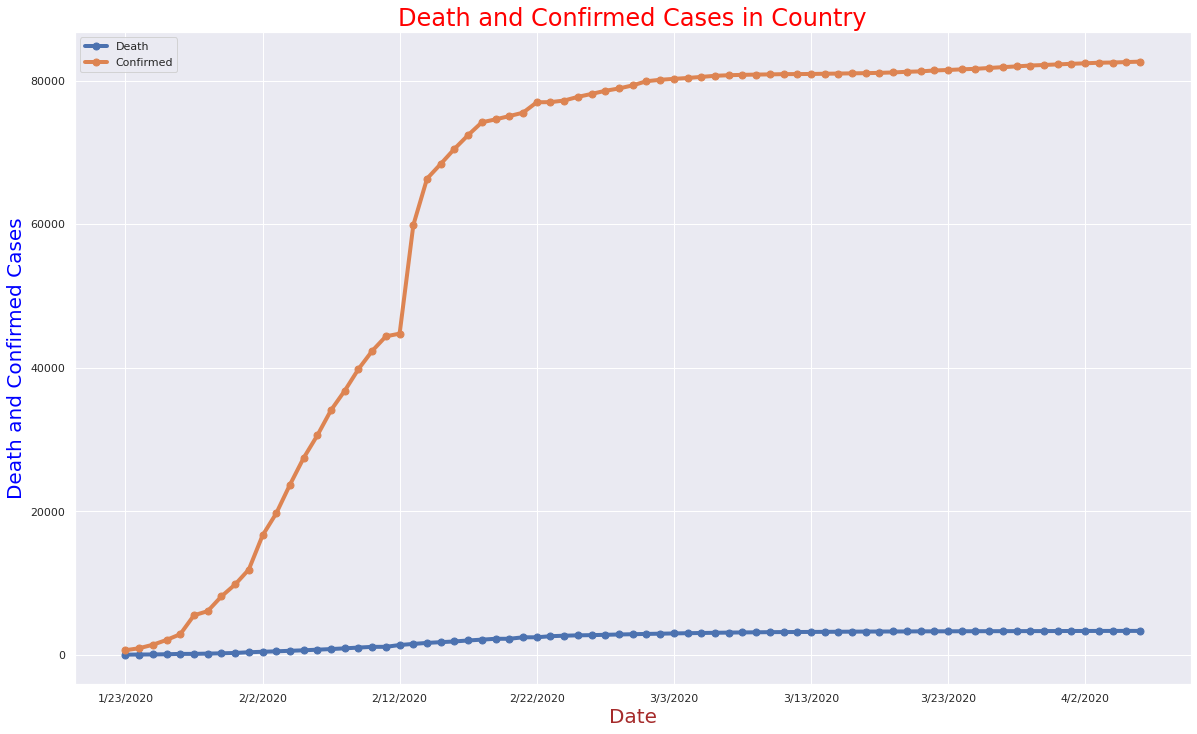

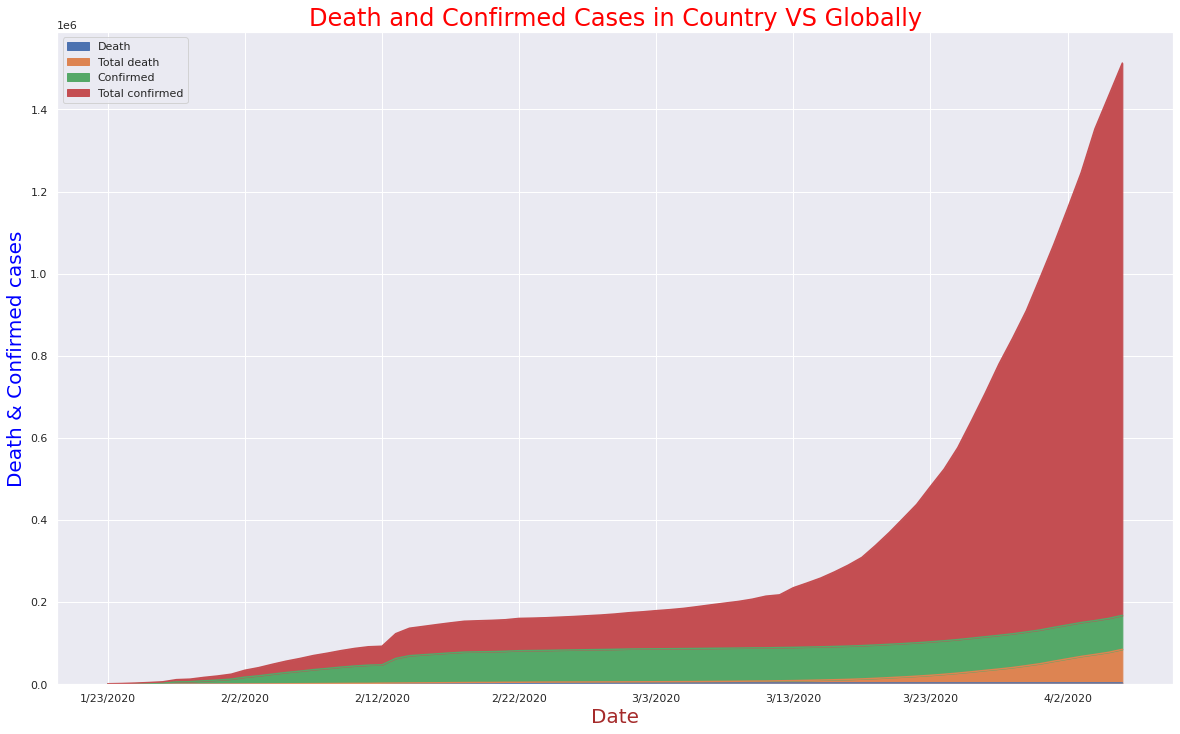

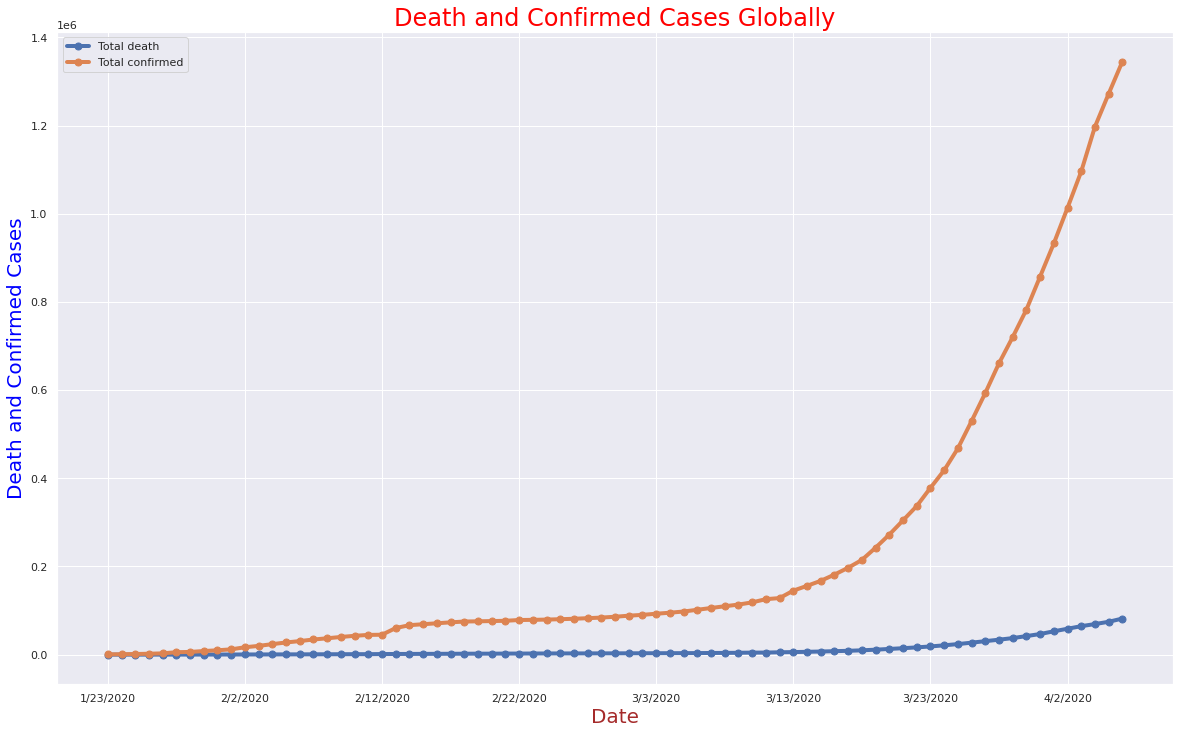

In [ ]:
x = input ("Enter country's name:")

used_death = raw_data_deaths.groupby('Country/Region').sum().reset_index()
new_df = pd.DataFrame({'Country':used_death['Country/Region']})
if x not in new_df.values:
    print("Country does not exist in data")
else:
    final_result(x)

##### Hasil analisis:
Perbandingan angka kematian setiap negara dengan pertumbuhan secara global rata-rata menunjukkan keselarasan dalam kurvanya. Memang ada beberapa negara yang dapat mempertahankan angka kasus kematian, namun kebanyakan mengalami kenaikan dalam kasus kematian. Ada pula beberapa negara yang tidak memiliki kasus kematian, negara-negara ini merupakan negara yang belum mengkonfirmasi adanya kasus terkonfirmasi dalam kurun waktu 22 Januari 2020 hingga 7 April 2020

### 5. Visualisasi jumlah pasien yang sembuh (recovered people)

In [ ]:
def show_head(df):
  return df.head()

def show_tail(df):
  return df.tail()

def cases_info(df):
  print(df.info())
  return df.describe()

def group_by(var_name, df):
  df = df.groupby(var_name).sum()
  return df

def delete_row(var_name, df):
  df = df.drop(var_name)
  return df

def transpose(df):
  df = df.T
  return df

**Periksa fungsi-fungsi yang sudah anda buat**

In [ ]:
show_head(raw_data_recovered)

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,...,12/3/2021,12/4/2021,12/5/2021,12/6/2021,12/7/2021,12/8/2021,12/9/2021,12/10/2021,12/11/2021,12/12/2021,12/13/2021,12/14/2021,12/15/2021,12/16/2021,12/17/2021,12/18/2021,12/19/2021,12/20/2021,12/21/2021,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,1/1/2022,1/2/2022,1/3/2022,1/4/2022,1/5/2022,1/6/2022,1/7/2022,1/8/2022,1/9/2022,1/10/2022,1/11/2022
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_tail(raw_data_recovered)

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,...,12/3/2021,12/4/2021,12/5/2021,12/6/2021,12/7/2021,12/8/2021,12/9/2021,12/10/2021,12/11/2021,12/12/2021,12/13/2021,12/14/2021,12/15/2021,12/16/2021,12/17/2021,12/18/2021,12/19/2021,12/20/2021,12/21/2021,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,1/1/2022,1/2/2022,1/3/2022,1/4/2022,1/5/2022,1/6/2022,1/7/2022,1/8/2022,1/9/2022,1/10/2022,1/11/2022
260,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
264,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cases_info(raw_data_recovered)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Columns: 725 entries, Province/State to 1/11/2022
dtypes: float64(2), int64(721), object(2)
memory usage: 1.5+ MB
None


,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,...,12/3/2021,12/4/2021,12/5/2021,12/6/2021,12/7/2021,12/8/2021,12/9/2021,12/10/2021,12/11/2021,12/12/2021,12/13/2021,12/14/2021,12/15/2021,12/16/2021,12/17/2021,12/18/2021,12/19/2021,12/20/2021,12/21/2021,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,1/1/2022,1/2/2022,1/3/2022,1/4/2022,1/5/2022,1/6/2022,1/7/2022,1/8/2022,1/9/2022,1/10/2022,1/11/2022
count,264.000000,264.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,...,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0
mean,18.731013,27.087363,0.113208,0.120755,0.147170,0.158491,0.211321,0.245283,0.407547,0.479245,0.547170,0.849057,1.083019,1.796226,2.366038,3.233962,4.264151,5.633962,7.607547,9.875472,12.252830,14.901887,17.675472,19.437736,23.750943,30.418868,35.460377,41.007547,47.498113,54.158491,60.841509,68.607547,71.298113,86.384906,88.290566,95.203774,105.309434,114.671698,125.592453,138.543396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,24.724885,73.922864,1.723944,1.727820,1.918076,1.982254,2.611285,2.807631,4.948211,5.442585,5.600886,8.768479,10.492453,18.315314,23.987804,32.480151,39.592982,51.165192,69.774995,90.217853,112.425161,138.954585,164.918599,169.113634,216.601169,297.043452,349.430239,411.968694,487.282789,564.986931,639.526628,728.900618,735.638795,944.822051,948.139076,1034.434912,1170.719525,1293.225601,1441.282281,1626.426050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.454096,-10.007650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,19.254600,24.242250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
new_recovered = group_by('Country/Region', raw_data_recovered)
new_recovered.reset_index(inplace=True)
new_recovered = transpose(new_recovered)
new_recovered = delete_row(['Lat', 'Long'], new_recovered)
new_recovered = new_recovered.rename(index={'Country/Region':'Date'})
new_recovered.reset_index(inplace=True)
new_recovered.columns = new_recovered.iloc[0]
new_recovered = delete_row(0, new_recovered)
new_recovered = new_recovered.iloc[:77].reset_index(drop=True)
new_recovered

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,1/22/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1/24/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/26/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,4/3/2020,10,89,62,16,1,0,266,43,649,2022,32,1,382,26,0,53,2872,0,2,2,1,27,0,127,65,30,50,0,0,0,35,17,2175,0,0,427,76760,55,0,...,0,282,10,70,0,1,95,0,30513,24,2,0,0,0,4846,0,50,0,3,581,0,17,0,1,5,484,9707,0,22,108,208,86,25,0,52,85,21,0,2,0
73,4/4/2020,10,99,90,21,2,0,279,43,701,2507,32,0,423,30,0,53,3247,0,2,2,1,30,0,127,66,34,66,0,0,0,50,17,2577,0,0,528,76946,85,0,...,0,297,10,79,0,1,95,0,34219,27,2,0,0,0,6415,2,50,0,3,612,0,17,0,1,5,786,14652,0,25,125,215,93,25,0,52,90,21,0,2,0
74,4/5/2020,15,104,90,26,2,0,280,57,757,2998,32,0,431,33,6,52,3751,0,5,2,2,30,0,127,73,37,90,0,0,0,50,17,3012,0,0,618,77207,88,0,...,0,320,10,79,0,1,95,0,38080,33,2,0,0,0,6415,2,50,0,3,674,0,20,0,1,5,1042,17448,0,28,144,229,104,30,0,52,90,25,0,3,0
75,4/6/2020,18,116,90,31,2,0,325,62,1080,3463,44,4,458,33,6,53,3986,0,5,2,2,47,0,127,82,39,108,0,0,1,53,17,3256,0,0,728,77310,88,0,...,0,344,8,102,0,1,95,0,40437,38,2,0,0,0,8056,2,57,0,3,793,0,23,0,1,5,1326,19581,0,28,167,287,123,30,0,65,95,24,0,5,0


**Data total pasien COVID-19 yang sembuh.**

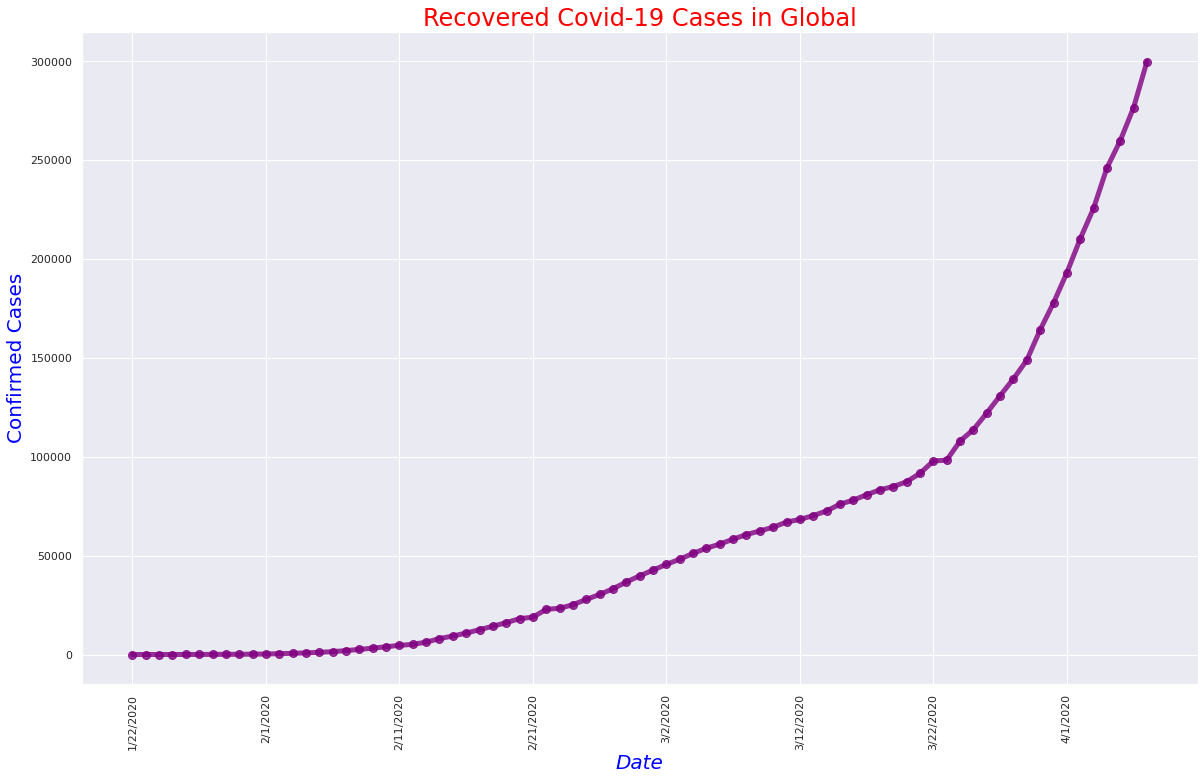

In [ ]:
new_recovered["sum"] = new_recovered.drop('Date', axis=1, inplace=False).sum(axis=1)
new_recovered = new_recovered.set_index('Date')

new_recovered['sum'].plot(color = 'Purple', alpha = 0.8, linewidth=5, marker='o', markersize=8)
plt.xticks(rotation=90)
plt.title("Recovered Covid-19 Cases in Global", size=24, color='Red')
plt.xlabel('Date', size=20, color='Blue', style='italic')
plt.ylabel('Confirmed Cases', size=20, color='Blue')
plt.gcf().set_size_inches(20, 12)

##### Hasil analisis berdasarkan hasil visualisasi diatas:
Berdasarkan visualisasi diatas, total data pasian Covid-19 yang sembuh terus mengalami peningkatan. Walaupun kasus terkonfirmasi dan kasus kematian juga terus meningkat, lineplot (visualisasi) diatas memberikan gambaran bahwa setidaknya dari kasus-kasus Covid-19 yang terkonfirmasi masih terdapat pasien yang dapat sembuh dari penyakit yang dihasilkan virus tersebut. Hasil visualisasi diatas merupakan total data pasien Covid-19 yang sembuh pada negara-negara yang terdapat dalam data, angka yang digunakan merupakan jumlah dari total pasien yang sembuh dari setiap negara dan tercatat berdasarkan kurun waktu 22 Januari 2020 hingga 7 April 2020.

**Visualisasi yang sama juga dilakukan pada beberapa negara berikut (France, Spain, China, US, Italy, and Australia).**

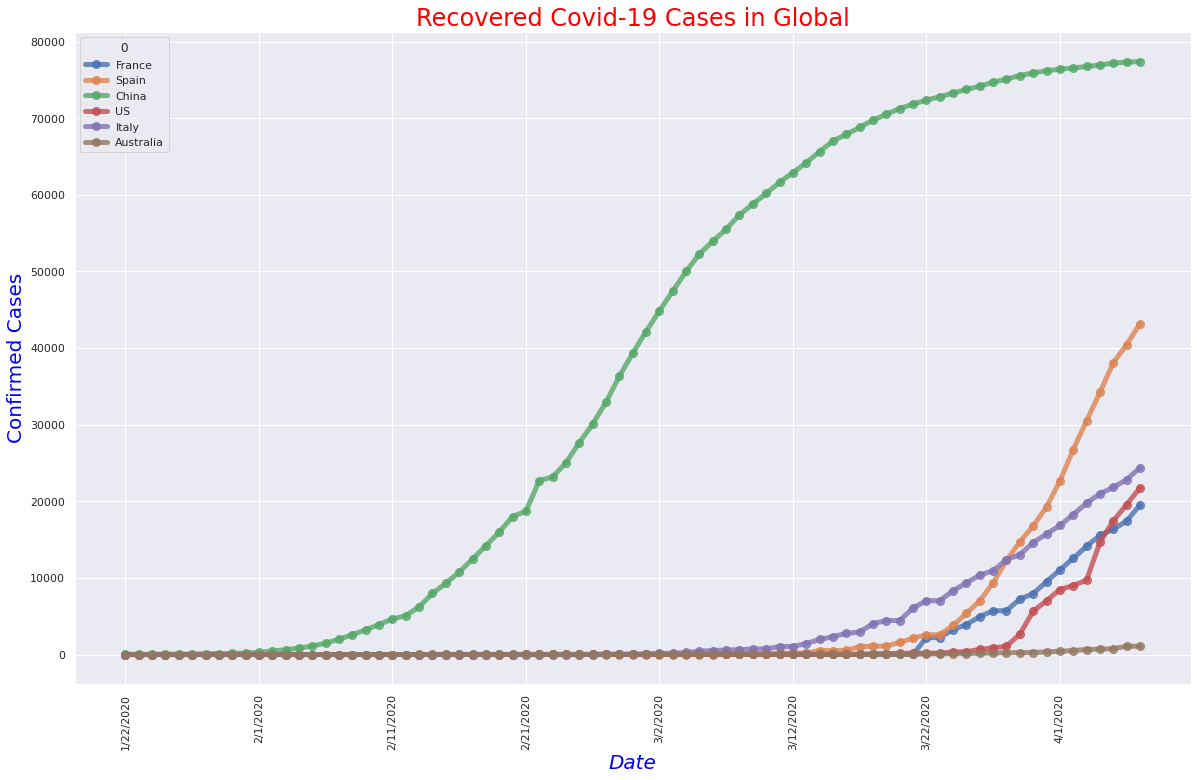

In [ ]:
new_recovered[['France', 'Spain', 'China', 'US', 'Italy', 'Australia']].plot( alpha = 0.8, linewidth=5, marker='o', markersize=8)
plt.xticks(rotation=90)
plt.title("Recovered Covid-19 Cases in Global", size=24, color='Red')
plt.xlabel('Date', size=20, color='Blue', style='italic')
plt.ylabel('Confirmed Cases', size=20, color='Blue')
plt.gcf().set_size_inches(20, 12)

##### Hasil analisis berdasarkan hasil visualisasi diatas:  
Berdasarkan hasil visualisasi diatas, tingkat penyembuhan dari kasus Covid-19 di keenam negara tersebut terus meningkat, yang paling mengalami peningkatan yang pesat adalah negara China, bila dibandingkan dengan kenaikan kasus terkonfirmasi dan kematian.

Pada negara Australia, tingkat penyembuhannya tidak mengalami kenaikan yang signifikan mengingat kasus terkonfirmasi yang terdapat pada negara tersebut juga masih sedikit hal ini yang mungkin menjadi faktor tingkat penyembuhan tersebut. Selain itu dapat dilihat bahwa negara lainnya mengalami kenaikan yang signifikan. Terlihat bahwa negara yang menyusul perkembangan dari negara China merupakan negara Spanyol.